# Deep Learning | Digit classifier using TensorFlow

Deep learning, MNIST  digit classifier with more than 99% accuracy, using callback once reached that accuracy

#### Load the libraries

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### Load the data 

In [16]:
mnist = tf.keras.datasets.mnist

MNIST handwritten digit database detail : https://en.wikipedia.org/wiki/MNIST_database

#### Split the data

In [17]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

we can check few data here like 

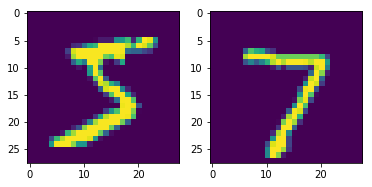

In [18]:
plt.subplot(1, 2, 1)
# first train data 
plt.imshow(x_train[0])
plt.subplot(1, 2, 2)
# first test  data 
plt.imshow(x_test[0])

In [19]:
# Print the related labels
print(y_train[0])
print(y_test[0])

5
7


#### Normalization

if we print any of image, then it will come as array of number between 0-255, to ease the process and recude the 
calculation cast, we should normalized all the values between 0 to 1, If we devide all the values by 255, it will come 
under 0 to 1 and have same essense 

In [20]:
#print(x_train[0])

In [21]:
x_train, x_test = x_train / 255.0, x_test / 255.0

https://stats.stackexchange.com/questions/41704/how-and-why-do-normalization-and-feature-scaling-work

#### Create A model defintion 

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Sequential** Linear stack of layers in the neural network  <br /> 
https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential <br /> 
https://keras.io/getting-started/sequential-model-guide/ <br /> 
https://medium.com/machine-learning-bites/deeplearning-series-sequence-models-7855babeb586  <br /> 

**Flatten** To reduce complexity and dimension of data to one <br/>
https://stackoverflow.com/questions/43237124/role-of-flatten-in-keras

**Dense** A dense layer is a classic fully connected neural network layer : each input node is connected to each output node

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.
https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding and computaion <br/>
https://en.wikipedia.org/wiki/Softmax_function


#### Compile the Model

Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**An optimizer** This could be the string identifier of an existing optimizer (such as adam, rmsprop or adagrad), or an instance of the Optimizer class. <br/>
**A loss function** This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. <br/>
**A list of metrics** For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function. <br/>
https://keras.io/getting-started/sequential-model-guide/

#### Callback

Monitor and Improve the Deep Learning, use to enable us to troubleshoot Deep learning projects. </br>
Its like print statement of conventional programming, you can identify if some condition fulfill and you don't have to 
wait the complete training cycle execution <br/>
It can even help us to prevent overfitting by implementing early stopping or customizing the learning rate on each iteration.

In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\n Reached 99% accuracy so stopping the training!")
      self.model.stop_training = True

#### Final Model creation 

In [33]:
callbacks = myCallback()
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.2004 - acc: 0.9407
Epoch 2/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.0781 - acc: 0.9763
Epoch 3/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0521 - acc: 0.9839
Epoch 4/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0366 - acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0268 - acc: 0.9913

 Reached 99% accuracy so stopping the training!


In [ ]:
Because oc callback condition, it breaks in 5 iteration even we defined 10 epochs

 ##### Model Evaluate

It is for evaluating your trained model. Its output is accuracy or loss, not prediction to your input data.

In [35]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 54us/step


[0.06422410915836226, 0.9804]

The evalution on **unseen data** returned a accuracy of about .9804, which is really great !!! Also, loss is very less, about .065

#### Model Predict 

It actually predicts, and its output is target value, predicted from your input data.

In [38]:
pre = model.predict(x_test)

In [47]:
['{:f}'.format(item) for item in pre[5]]

['0.000000',
 '0.999931',
 '0.000000',
 '0.000000',
 '0.000004',
 '0.000000',
 '0.000000',
 '0.000062',
 '0.000002',
 '0.000000']

As per the output, it predicts it **1**, rememmber the values are probablity for 0 to 9

Now we check the value too, just checking the label at position 5

In [40]:
y_test[5]

1

It's also 1, seems its giving right result and here we have written our first digit identification deep learning Program !!!
***Congratulations !!!***